# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

Quiero abordar los datos conforme se me ha instruido en las codificaciones en vivo y conforme he estudiado en la plataforma, me gustaría ver cada uno de los DF para poder identificar si tienen algún error en el formato y si es posible trabajar con ellos.

Considero que se me han dado todas las herramientas, sin embargo me gustaría utlizar funciones que pueda encontrar por mi cuenta para ver si son aplicables en este proyecto.

Deseo usar gráficos para comprender de mejor manera la información y poder indentificar picos o información de mayor valor.

## Inicialización

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [319]:
df_calls = pd.read_csv('megaline_calls.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_users = pd.read_csv('megaline_users.csv')
df_plans = pd.read_csv('megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [323]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [324]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Logro apreciar que existen dos planes, Surf y Ultimate, es importante destacar que uno es mas barato que el otro y que tiene beneficios superiores de mayor costo.


## Corregir datos

Por el momento no se necesita hacer una corrección en este DF, puedo ver que el formato de las columnas es correcto, por obvias razones lo expresado en moneda debe de estar en formato float, no veo fechas por lo que no hay que corregir eso.

## Enriquecer los datos

## Usuarios/as

In [332]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [333]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Veo que se necesitan corregir dos columnas, la de "reg_date" y la de "churn_date", usaré la fórmula pd.to_datetime

### Corregir los datos

In [337]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

### Enriquecer los datos

## Llamadas

In [341]:
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [342]:
# Imprime una muestra de datos para las llamadas

df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Se aprecia que el DF necesita mas información, por ejemplo un resumen por mes de cuantos minutos se llamó, también veo que será necesario saber si  se deben de redondear esos minutos para poder hacer el cargo correspondiente, se ven muchas líneas pero es por lo mismo porque no viene agrupado.

### Corregir los datos

In [347]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.to_period('M')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [351]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.describe()


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [352]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [353]:
# Imprime una muestra de datos para los mensajes



Veo que las fechas no vienen con el formato correcto, por lo que será necesario hacer el cambio de formato, encontré una formula dt.to_period('M) que se usa para convertir una columna de fechas a periodos mensuales, lo que considero podrá facilitar el análisis.

### Corregir los datos

In [464]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])


### Enriquecer los datos

In [467]:
df_messages['month'] = df_messages['message_date'].dt.to_period('M')

## Internet

In [361]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [362]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Veo que se deben de corregir los formatos de 'session_date', también el formato de periodo en el caso del mes.

### Corregir los datos

In [367]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


### Enriquecer los datos

In [ ]:
df_internet['month'] = df_internet['session_date'].dt.to_period('M')

## Estudiar las condiciones de las tarifas

In [372]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [374]:
calls_count = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

In [375]:
minutes_sum = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

In [376]:

messages_count = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

In [377]:

internet_usage = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='internet_mb_used')

In [379]:
df_usage = calls_count.merge(minutes_sum, on=['user_id', 'month'])
df_usage = df_usage.merge(messages_count, on=['user_id', 'month'])
df_usage = df_usage.merge(internet_usage, on=['user_id', 'month'])

In [380]:
df_usage = df_usage.merge(df_users[['user_id', 'plan', 'city']], on='user_id')
df_usage = df_usage.merge(df_plans, left_on='plan', right_on='plan_name')

In [382]:
df_usage['over_minutes'] = (df_usage['minutes_used'] - df_usage['minutes_included']).clip(lower=0)
df_usage['over_messages'] = (df_usage['messages_count'] - df_usage['messages_included']).clip(lower=0)
df_usage['over_gb'] = (df_usage['internet_mb_used']/1024 - df_usage['mb_per_month_included']/1024).clip(lower=0)
df_usage['revenue'] = (
    df_usage['usd_monthly_pay'] +
    df_usage['over_minutes'] * df_usage['usd_per_minute'] +
    df_usage['over_messages'] * df_usage['usd_per_message'] +
    df_usage['over_gb'] * df_usage['usd_per_gb']
)
df_usage.head()

,user_id,month,calls_count,minutes_used,messages_count,internet_mb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,over_minutes,over_messages,over_gb,revenue
0,1000,2018-12,16,116.83,11,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0,0.000000,70.000000
1,1001,2018-08,27,171.14,30,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,0.000000,20.000000
2,1001,2018-09,49,297.69,44,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,0.000000,20.000000
3,1001,2018-10,65,374.11,53,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,3,6.807119,88.161191
4,1001,2018-11,64,404.59,36,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,0.0,0,3.070605,50.706055


## Estudia el comportamiento de usuario

### Llamadas

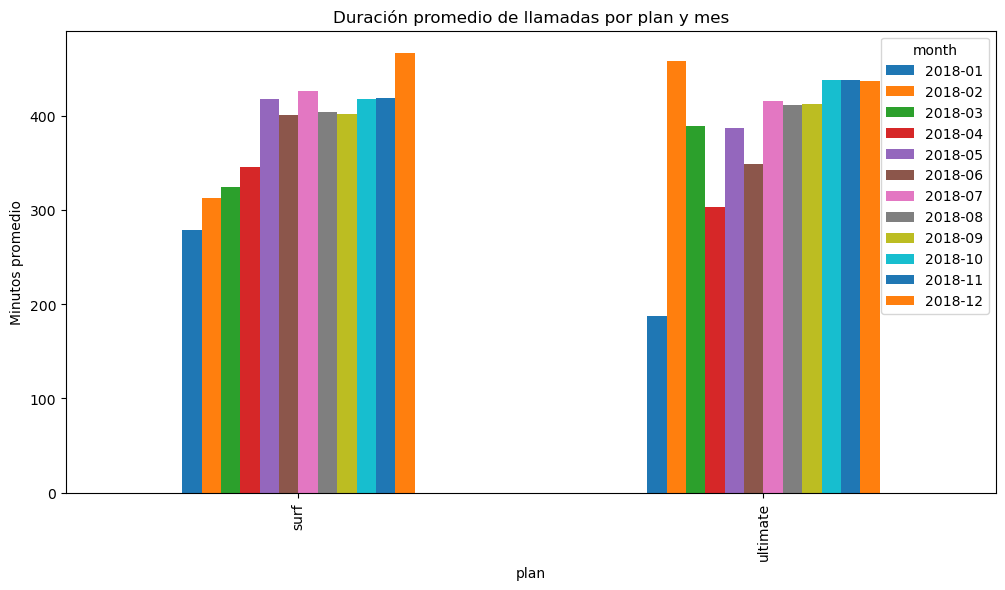

In [386]:
avg_duration = df_usage.groupby(['plan', 'month'])['minutes_used'].mean().unstack()
avg_duration.plot(kind='bar', figsize=(12,6))
plt.title('Duración promedio de llamadas por plan y mes')
plt.ylabel('Minutos promedio')
plt.show()

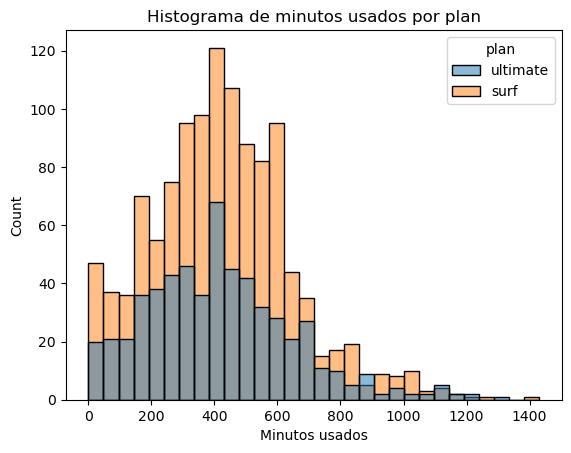

In [387]:
sns.histplot(
    data=df_usage,
    x="minutes_used",
    hue="plan",
    alpha=0.5,
    multiple="layer",  # sobrepone los histogramas
    legend=True
)
plt.title("Histograma de minutos usados por plan")
plt.xlabel("Minutos usados")
plt.show()

In [389]:
stats_calls = df_usage.groupby('plan')['minutes_used'].agg(['mean','var'])
stats_calls

,mean,var
plan,,
surf,420.778483,49492.562612
ultimate,417.562159,55607.233145


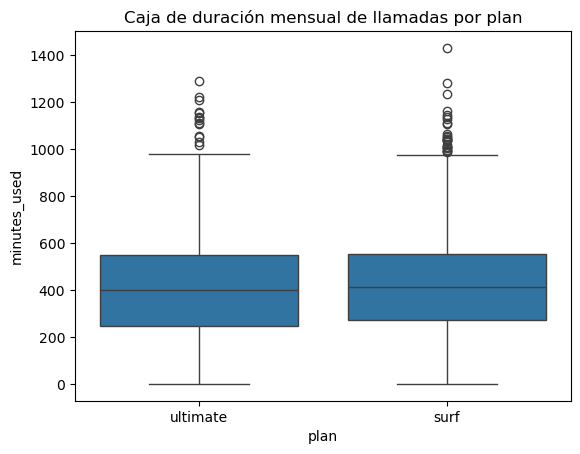

In [390]:
sns.boxplot(x='plan', y='minutes_used', data=df_usage)
plt.title('Caja de duración mensual de llamadas por plan')
plt.show()

### Mensajes

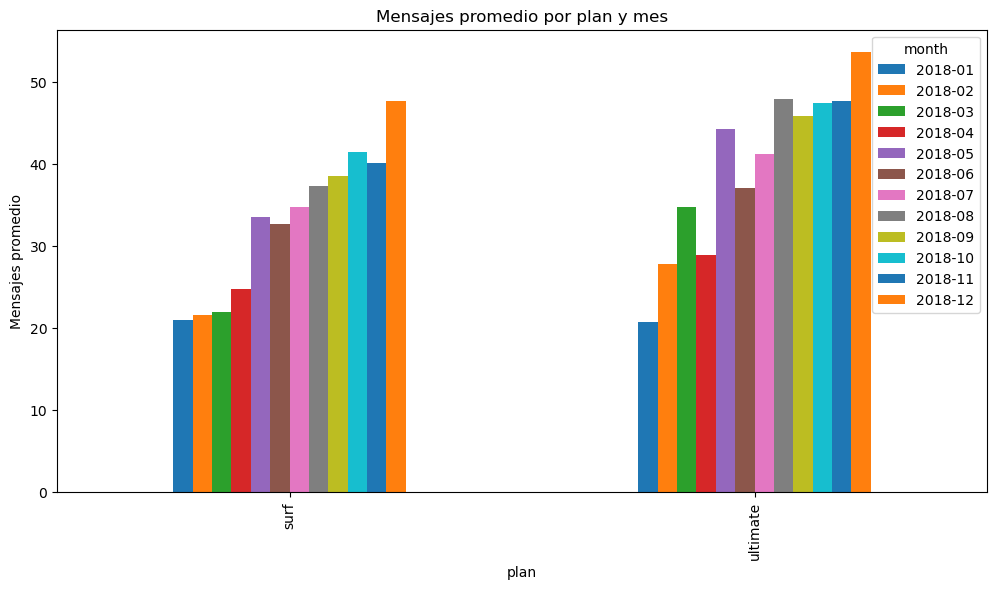

In [393]:
msg_avg = df_usage.groupby(['plan', 'month'])['messages_count'].mean().unstack()
msg_avg.plot(kind='bar', figsize=(12,6))
plt.title('Mensajes promedio por plan y mes')
plt.ylabel('Mensajes promedio')
plt.show()


Logro ver que hay una tendencia a mandar mensajes a lo lagro del año, en enero no mandan tantos mensajes como en diciembre, puedo inferir que los mensajes se mandan mas en diciembre por lo mismo de las fiestas decembrinas y fin de año.

Los usuarios del plan Ultimate muestran consistentemente un promedio de mensajes más alto que los del plan Surf. Eso sugiere que el segmento de Ultimate valora más la mensajería y, por tanto, está dispuesto a pagar más por ella.

In [395]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



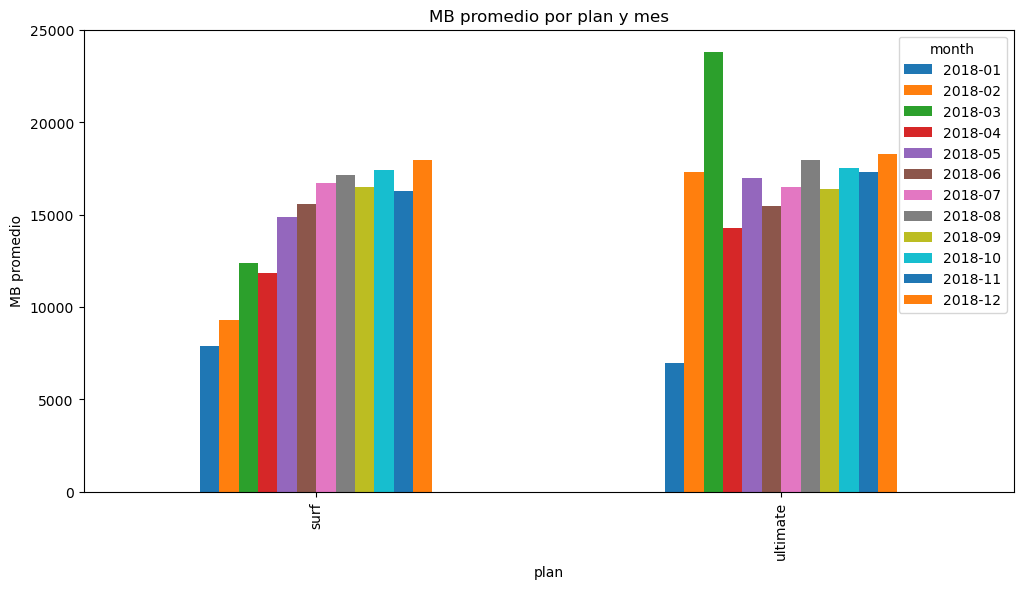

In [396]:
internet_avg = df_usage.groupby(['plan', 'month'])['internet_mb_used'].mean().unstack()
internet_avg.plot(kind='bar', figsize=(12,6))
plt.title('MB promedio por plan y mes')
plt.ylabel('MB promedio')
plt.show()

### Internet

El plan Ultimate muestra un consumo mensual promedio claramente superior al plan Surf, esto puede confirmar que los usuarios exigen mayor ancho de banda y está dispuesto a pagar por él.

El plan Surf permanece constante en un nivel más bajo, lo cual indica que es un producto de bajo costo para usuarios con necesidades moderadas.

Hay meses con picos notables (por ejemplo, julio y diciembre), probablemente asociados a vacaciones, streaming intensivo o teletrabajo estacional.

Entre meses “normales” la variación es moderada, lo que sugiere un consumo estable.

## Ingreso

In [445]:
revenue_stats = df_usage.groupby('plan')['revenue'].describe()
revenue_stats = revenue_stats.rename(columns={
    '25%': 'Q1',
    '50%': 'Mediana',
    '75%': 'Q3'
})

print(revenue_stats)

           count       mean        std   min    Q1    Mediana        Q3  \
plan                                                                      
surf      1180.0  56.877475  51.828245  20.0  20.0  36.841452  76.30906   
ultimate   579.0  72.062930  10.482571  70.0  70.0  70.000000  70.00000   

                 max  
plan                  
surf      581.328509  
ultimate  178.522764  


el promedio de Ultimate es mayor que el promedio de Surf, esto confirma que el plan premium aporta más revenue en promedio.

Una std alta indica que los ingresos varían mucho mes a mes: podría haber variaciones o comportamientos estacionales.

La mediana no la logro comprender del todo pero puedo inferir que sin verse tan afectado por variaciones en el año.

puedo apreciar que en el plan surf el cuartil Q3 tiene una cantidad considerable para poder enfocarse en esos usuarios y proponerles mejores servicios.

## Prueba las hipótesis estadísticas

In [449]:
alpha = 0.05
ingresos_ult = df_usage[df_usage['plan']=='ultimate']['revenue']
ingresos_surf = df_usage[df_usage['plan']=='surf']['revenue']
t_stat, p_value = ttest_ind(ingresos_ult, ingresos_surf, equal_var=False)
print(f"t = {t_stat:.2f}, p = {p_value:.3f}")
if p_value < alpha:
    print("⇒ Rechazamos H: hay diferencia significativa de ingresos.")
else:
    print("⇒ No rechazamos H: no hay evidencia de diferencia.")

t = 9.67, p = 0.000
⇒ Rechazamos H: hay diferencia significativa de ingresos.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [455]:
alpha = 0.05
es_ny_nj = df_usage['city'].str.contains('NY|NJ', regex=True, na=False) #estuve investigando y encontré (.str.contains) que me pareció excelente para este proceso.
ingresos_ny_nj = df_usage[es_ny_nj]['revenue']
ingresos_otros = df_usage[~es_ny_nj]['revenue']
t_stat, p_value = ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False)
print(f"t = {t_stat:.2f}, p = {p_value:.3f}")
if p_value < alpha:
    print("⇒ Rechazamos H₀: hay diferencia significativa de ingresos.")
else:
    print("⇒ No rechazamos H₀: no hay evidencia de diferencia.")

t = -1.21, p = 0.228
⇒ No rechazamos H₀: no hay evidencia de diferencia.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Sin duda alguna concluir esto es un reto, puedo decir que el hecho de agrupar los datos por usuario y por mes es esencial para poder trabajar los datos, con esto pude detectar patrones de consumo claros.

Segmentar los planes por regiones para compararlos como son Surf vs Ultimet y NY-NJ vs el resto del país ayudó a identificar oportunidades de incrementar las ventas haciendo ajustes tarifarios y mejorar las ofertas según sea lo que necesite cada segmento.

Decidí hacer la prueba t.-tes de Welcj porque sabía que no podía asumir varianzas iguales entre grupos, esto me dió confianza para poder afirmar las diferencias.

Pude detectar picos estratégicos analizando los datos por mes y ví que el consumo aumenta en vacaciones por lo que se puede dar esa información a la empresa para que pueda diseñar campañas publicitarias según sean las necesidades.

Considero que estos datos son esenciales para la toma de decisiones, si la empresa logra valorar esta información se pueden asegurar rentabilidad en el negocio.